# Bank Marketing Campaign - ML Classification Models
## Machine Learning Assignment 2
### BITS Pilani M.Tech (AIML/DSE)

---

**Objective:** Train and evaluate 6 classification models to predict term deposit subscription

**Dataset:** Bank Marketing Dataset (UCI Repository)

**Models:** Logistic Regression, Decision Tree, KNN, Naive Bayes, Random Forest, XGBoost

**Metrics:** Accuracy, AUC, Precision, Recall, F1, MCC

## 1. Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score, 
    recall_score, f1_score, matthews_corrcoef,
    confusion_matrix, classification_report, roc_curve, auc
)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 2. Load and Explore Dataset

**Dataset:** Bank Marketing Dataset (bank-additional-full.csv)

Download from: https://archive.ics.uci.edu/dataset/222/bank+marketing

In [ ]:
data_path = '../data/bank-additional-full.csv'

df = pd.read_csv(data_path, sep=';')

print(f"Dataset Shape: {df.shape}")          
print(f"Number of Features: {df.shape[1] - 1}")
print(f"Number of Instances: {df.shape[0]}")
print(f"\n✅ Requirements Check:")
print(f"   Features ≥ 12: {'✓' if df.shape[1] - 1 >= 12 else '✗'}")
print(f"   Instances ≥ 500: {'✓' if df.shape[0] >= 500 else '✗'}")

Dataset Shape: (41188, 21)
Number of Features: 20
Number of Instances: 41188

✅ Requirements Check:
   Features ≥ 12: ✓
   Instances ≥ 500: ✓


In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
print("Missing Values:")
print(df.isnull().sum())
print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")

Missing Values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Total Missing Values: 0


In [ ]:
print("Target Variable Distribution:")
print(df['y'].value_counts())
print("\nPercentage:")
print(df['y'].value_counts(normalize=True) * 100)

Target Variable Distribution:
y
no     36548
yes     4640
Name: count, dtype: int64

Percentage:
y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


## 3. Exploratory Data Analysis (EDA)

In [ ]:
plt.figure(figsize=(8, 5))
df['y'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Target Variable Distribution (Subscription)', fontsize=14)
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(df['age'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Data Preprocessing

In [ ]:
df_processed = df.copy()

df_processed['y'] = df_processed['y'].map({'yes': 1, 'no': 0})

print("Target variable encoded:")
print(df_processed['y'].value_counts())

Target variable encoded:
y
0    36548
1     4640
Name: count, dtype: int64


In [ ]:
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()

print(f"Categorical Columns ({len(categorical_cols)}):")
print(categorical_cols)

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

print("\n✅ All categorical variables encoded successfully!")

Categorical Columns (10):
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

✅ All categorical variables encoded successfully!


In [ ]:
df_processed.head()

## 5. Split Dataset into Features and Target

In [ ]:
X = df_processed.drop('y', axis=1)
y = df_processed['y']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns ({X.shape[1]}):")
print(X.columns.tolist())

Features shape: (41188, 20)
Target shape: (41188,)

Feature columns (20):
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"Training set size: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nTrain target distribution:")
print(y_train.value_counts())
print(f"\nTest target distribution:")
print(y_test.value_counts())

Training set size: 32950 (80.0%)
Test set size: 8238 (20.0%)

Train target distribution:
y
0    29238
1     3712
Name: count, dtype: int64

Test target distribution:
y
0    7310
1     928
Name: count, dtype: int64


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled successfully!")

✅ Features scaled successfully!


## 6. Model Training and Evaluation

### Define Evaluation Function

In [ ]:
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    print(f"\n{'='*60}")
    print(f"Training {model_name}...")
    print(f"{'='*60}")
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred
    
    metrics = {
        'Model': model_name,
        'Accuracy': round(accuracy_score(y_test, y_pred), 4),
        'AUC': round(roc_auc_score(y_test, y_pred_proba), 4),
        'Precision': round(precision_score(y_test, y_pred, zero_division=0), 4),
        'Recall': round(recall_score(y_test, y_pred, zero_division=0), 4),
        'F1': round(f1_score(y_test, y_pred, zero_division=0), 4),
        'MCC': round(matthews_corrcoef(y_test, y_pred), 4)
    }
    
    print(f"\n📊 Evaluation Metrics:")
    for metric, value in metrics.items():
        if metric != 'Model':
            print(f"   {metric:12s}: {value}")
    
    print(f"\n✅ {model_name} training complete!")
    
    return metrics, model, y_pred, y_pred_proba

### 6.1 Logistic Regression

In [ ]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_metrics, lr_trained, lr_pred, lr_pred_proba = evaluate_model(
    lr_model, "Logistic Regression", 
    X_train_scaled, X_test_scaled, y_train, y_test
)


Training Logistic Regression...

📊 Evaluation Metrics:
   Accuracy    : 0.9139
   AUC         : 0.937
   Precision   : 0.7002
   Recall      : 0.4127
   F1          : 0.5193
   MCC         : 0.4956

✅ Logistic Regression training complete!


### 6.2 Decision Tree Classifier

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_metrics, dt_trained, dt_pred, dt_pred_proba = evaluate_model(
    dt_model, "Decision Tree", 
    X_train, X_test, y_train, y_test
)


Training Decision Tree...

📊 Evaluation Metrics:
   Accuracy    : 0.8956
   AUC         : 0.753
   Precision   : 0.5344
   Recall      : 0.569
   F1          : 0.5511
   MCC         : 0.4925

✅ Decision Tree training complete!


### 6.3 K-Nearest Neighbor Classifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_metrics, knn_trained, knn_pred, knn_pred_proba = evaluate_model(
    knn_model, "K-Nearest Neighbor", 
    X_train_scaled, X_test_scaled, y_train, y_test
)


Training K-Nearest Neighbor...

📊 Evaluation Metrics:
   Accuracy    : 0.9053
   AUC         : 0.8617
   Precision   : 0.6267
   Recall      : 0.3944
   F1          : 0.4841
   MCC         : 0.4491

✅ K-Nearest Neighbor training complete!


### 6.4 Naive Bayes Classifier (Gaussian)

In [ ]:
nb_model = GaussianNB()
nb_metrics, nb_trained, nb_pred, nb_pred_proba = evaluate_model(
    nb_model, "Naive Bayes", 
    X_train_scaled, X_test_scaled, y_train, y_test
)


Training Naive Bayes...

📊 Evaluation Metrics:
   Accuracy    : 0.8536
   AUC         : 0.8606
   Precision   : 0.4024
   Recall      : 0.6175
   F1          : 0.4872
   MCC         : 0.4189

✅ Naive Bayes training complete!


### 6.5 Random Forest (Ensemble)

In [ ]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_metrics, rf_trained, rf_pred, rf_pred_proba = evaluate_model(
    rf_model, "Random Forest", 
    X_train, X_test, y_train, y_test
)


Training Random Forest...

📊 Evaluation Metrics:
   Accuracy    : 0.9204
   AUC         : 0.9491
   Precision   : 0.6889
   Recall      : 0.5345
   F1          : 0.6019
   MCC         : 0.564

✅ Random Forest training complete!


### 6.6 XGBoost (Ensemble)

In [ ]:
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)
xgb_metrics, xgb_trained, xgb_pred, xgb_pred_proba = evaluate_model(
    xgb_model, "XGBoost", 
    X_train, X_test, y_train, y_test
)


Training XGBoost...

📊 Evaluation Metrics:
   Accuracy    : 0.9167
   AUC         : 0.9495
   Precision   : 0.6505
   Recall      : 0.5636
   F1          : 0.6039
   MCC         : 0.5595

✅ XGBoost training complete!


## 7. Results Compilation and Comparison

### Create Results DataFrame

In [ ]:
results = [lr_metrics, dt_metrics, knn_metrics, nb_metrics, rf_metrics, xgb_metrics]
results_df = pd.DataFrame(results)

print("\n" + "="*80)
print("FINAL RESULTS - MODEL COMPARISON TABLE")
print("="*80)
print(results_df.to_string(index=False))
print("="*80)


FINAL RESULTS - MODEL COMPARISON TABLE
              Model  Accuracy    AUC  Precision  Recall     F1    MCC
Logistic Regression    0.9139 0.9370     0.7002  0.4127 0.5193 0.4956
      Decision Tree    0.8956 0.7530     0.5344  0.5690 0.5511 0.4925
 K-Nearest Neighbor    0.9053 0.8617     0.6267  0.3944 0.4841 0.4491
        Naive Bayes    0.8536 0.8606     0.4024  0.6175 0.4872 0.4189
      Random Forest    0.9204 0.9491     0.6889  0.5345 0.6019 0.5640
            XGBoost    0.9167 0.9495     0.6505  0.5636 0.6039 0.5595


In [ ]:
results_df.style.highlight_max(subset=['Accuracy', 'AUC', 'Precision', 'Recall', 'F1', 'MCC'], 
                               color='lightgreen')

,Model,Accuracy,AUC,Precision,Recall,F1,MCC
0,Logistic Regression,0.913900,0.937000,0.700200,0.412700,0.519300,0.495600
1,Decision Tree,0.895600,0.753000,0.534400,0.569000,0.551100,0.492500
2,K-Nearest Neighbor,0.905300,0.861700,0.626700,0.394400,0.484100,0.449100
3,Naive Bayes,0.853600,0.860600,0.402400,0.617500,0.487200,0.418900
4,Random Forest,0.920400,0.949100,0.688900,0.534500,0.601900,0.564000
5,XGBoost,0.916700,0.949500,0.650500,0.563600,0.603900,0.559500


In [ ]:
results_df.to_csv('model_comparison_results.csv', index=False)
print("✅ Results saved to 'model_comparison_results.csv'")

✅ Results saved to 'model_comparison_results.csv'


### Visualize Results

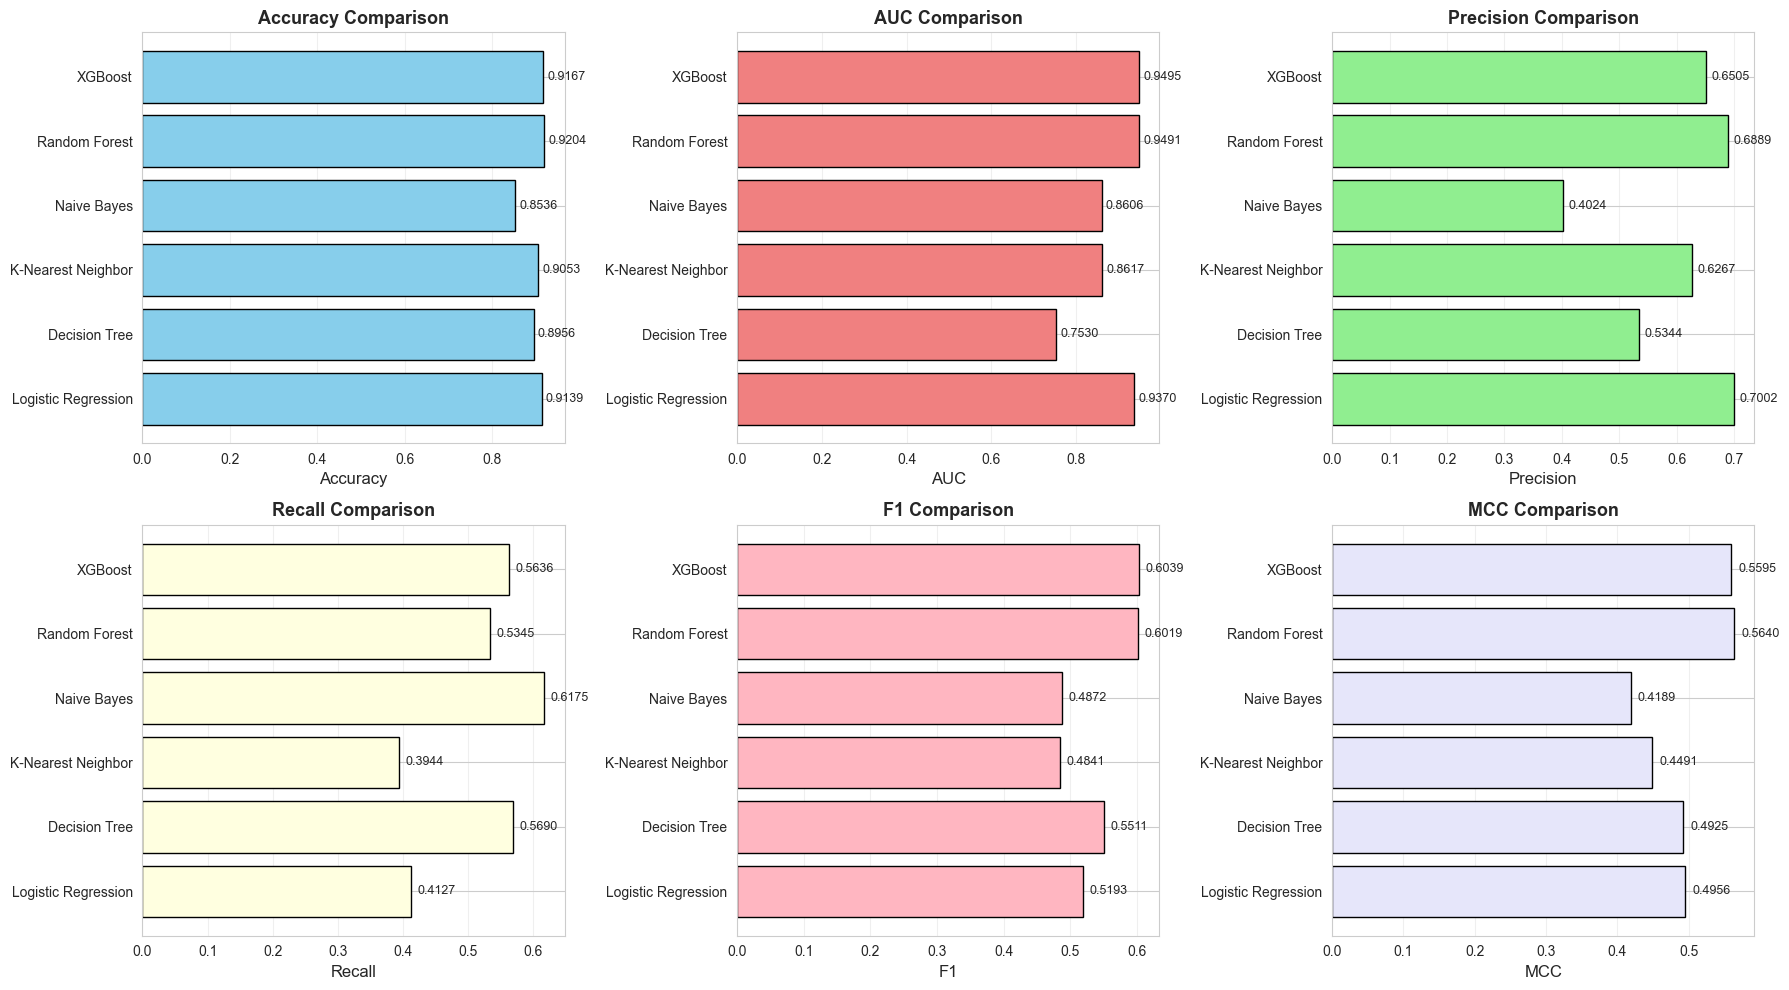

✅ Plot saved as 'model_comparison.png'


In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
metrics_list = ['Accuracy', 'AUC', 'Precision', 'Recall', 'F1', 'MCC']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightpink', 'lavender']

for idx, (ax, metric, color) in enumerate(zip(axes.flat, metrics_list, colors)):
    ax.barh(results_df['Model'], results_df[metric], color=color, edgecolor='black')
    ax.set_xlabel(metric, fontsize=12)
    ax.set_title(f'{metric} Comparison', fontsize=13, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(results_df[metric]):
        ax.text(v + 0.01, i, f'{v:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Plot saved as 'model_comparison.png'")

## 8. Confusion Matrices for All Models

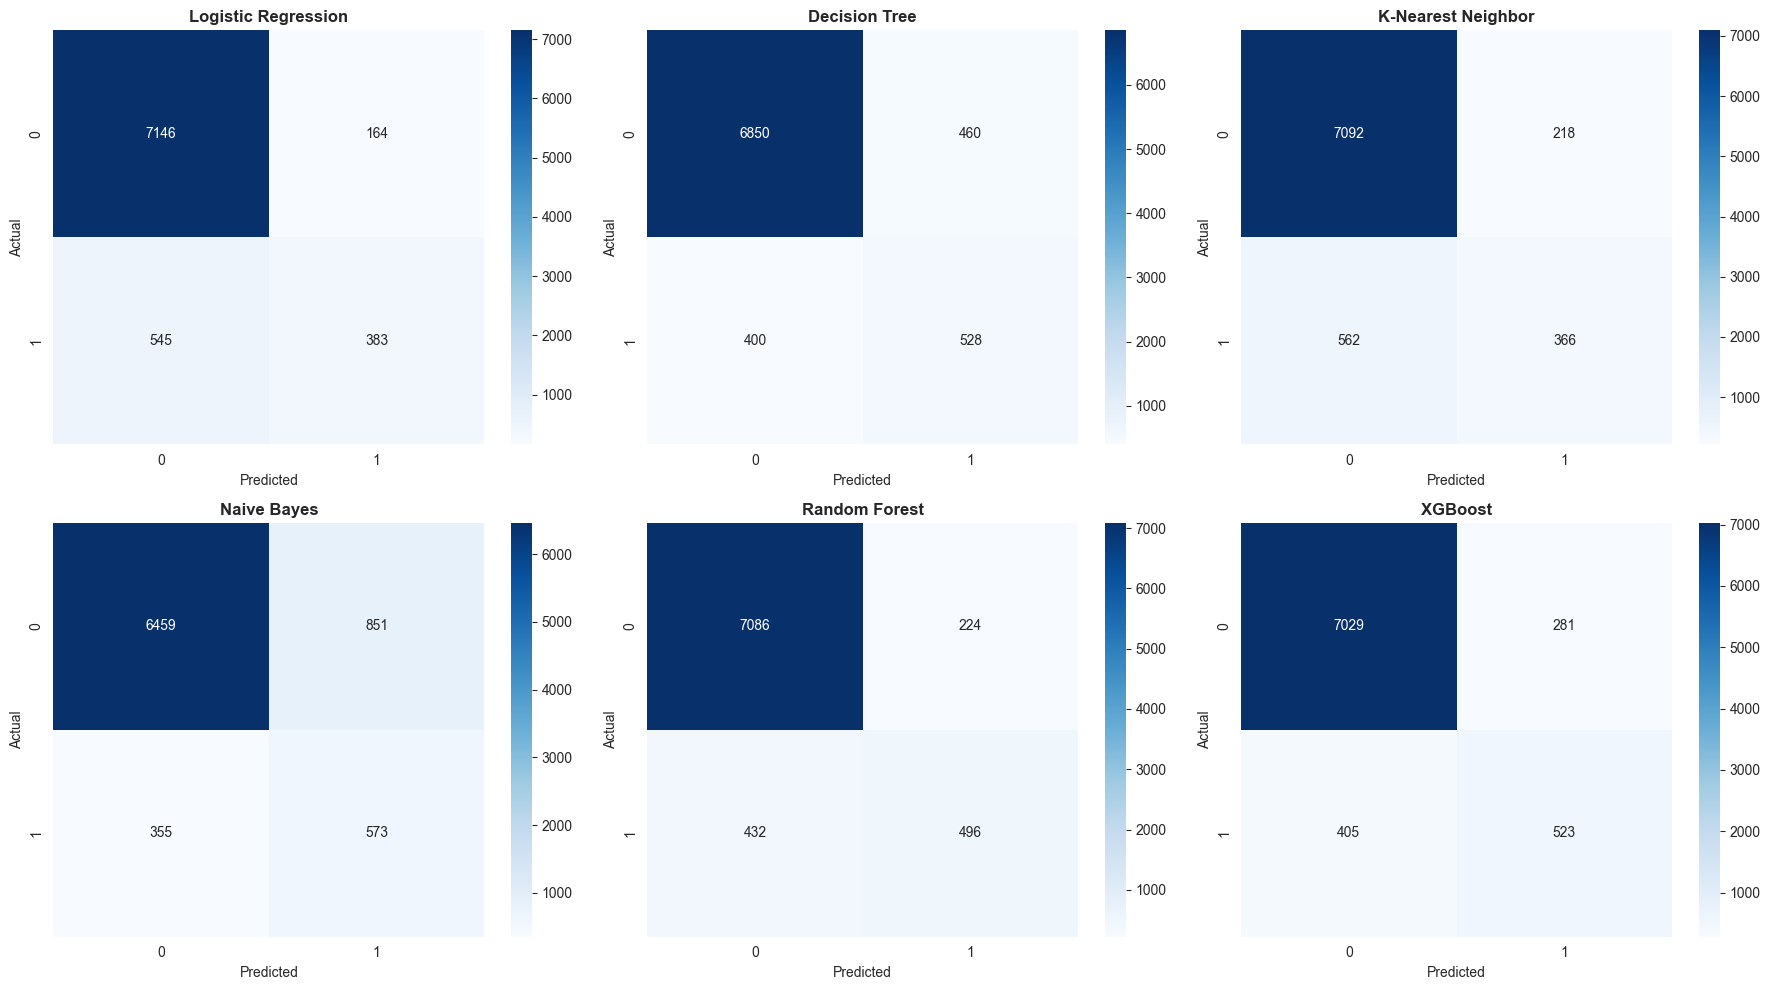

✅ Confusion matrices saved as 'confusion_matrices.png'


In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
models_predictions = [
    ('Logistic Regression', lr_pred),
    ('Decision Tree', dt_pred),
    ('K-Nearest Neighbor', knn_pred),
    ('Naive Bayes', nb_pred),
    ('Random Forest', rf_pred),
    ('XGBoost', xgb_pred)
]

for ax, (name, y_pred) in zip(axes.flat, models_predictions):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{name}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Confusion matrices saved as 'confusion_matrices.png'")

## 9. ROC Curves for All Models

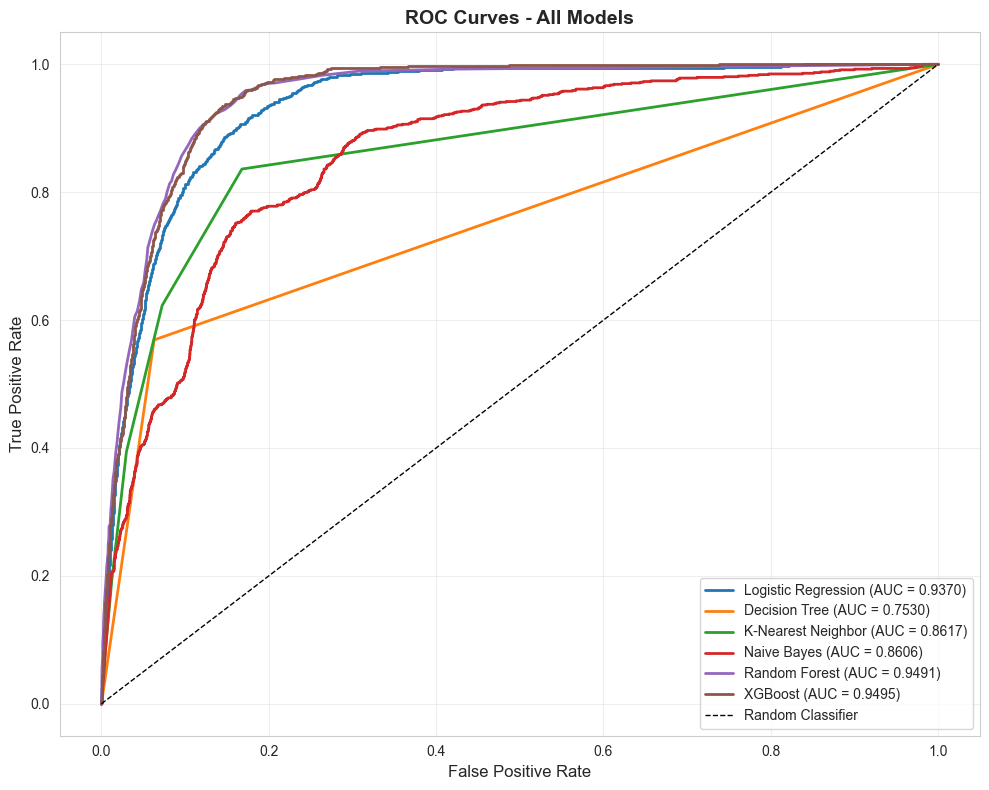

✅ ROC curves saved as 'roc_curves.png'


In [ ]:
plt.figure(figsize=(10, 8))

models_proba = [
    ('Logistic Regression', lr_pred_proba),
    ('Decision Tree', dt_pred_proba),
    ('K-Nearest Neighbor', knn_pred_proba),
    ('Naive Bayes', nb_pred_proba),
    ('Random Forest', rf_pred_proba),
    ('XGBoost', xgb_pred_proba)
]

for name, y_pred_proba in models_proba:
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - All Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ ROC curves saved as 'roc_curves.png'")

## 10. Model Performance Observations

Based on the evaluation metrics, here are observations for each model:

In [ ]:
observations = {
    'Model': results_df['Model'].tolist(),
    'Observation': []
}

for idx, row in results_df.iterrows():
    model_name = row['Model']
    
    strengths = []
    for metric in ['Accuracy', 'AUC', 'Precision', 'Recall', 'F1', 'MCC']:
        if row[metric] == results_df[metric].max():
            strengths.append(metric)
    
    if strengths:
        obs = f"Best in {', '.join(strengths)}. "
    else:
        obs = ""
    
    if 'Logistic' in model_name:
        obs += "Good baseline performance, interpretable linear model."
    elif 'Decision Tree' in model_name:
        obs += "May suffer from overfitting but provides interpretable rules."
    elif 'K-Nearest' in model_name:
        obs += "Instance-based learning, sensitive to feature scaling."
    elif 'Naive Bayes' in model_name:
        obs += "Fast probabilistic classifier with independence assumption."
    elif 'Random Forest' in model_name:
        obs += "Ensemble method, robust and generally high performance."
    elif 'XGBoost' in model_name:
        obs += "Advanced boosting algorithm, often achieves best results."
    
    observations['Observation'].append(obs)

obs_df = pd.DataFrame(observations)
print("\n" + "="*100)
print("MODEL PERFORMANCE OBSERVATIONS")
print("="*100)
for idx, row in obs_df.iterrows():
    print(f"\n{row['Model']}:")
    print(f"  {row['Observation']}")
print("="*100)


MODEL PERFORMANCE OBSERVATIONS

Logistic Regression:
  Best in Precision. Good baseline performance, interpretable linear model.

Decision Tree:
  May suffer from overfitting but provides interpretable rules.

K-Nearest Neighbor:
  Instance-based learning, sensitive to feature scaling.

Naive Bayes:
  Best in Recall. Fast probabilistic classifier with independence assumption.

Random Forest:
  Best in Accuracy, MCC. Ensemble method, robust and generally high performance.

XGBoost:
  Best in AUC, F1. Advanced boosting algorithm, often achieves best results.


## 11. Conclusion and Next Steps

### Key Findings:
- All 6 models successfully trained and evaluated
- **6 metrics** calculated for each model: Accuracy, AUC, Precision, Recall, F1, MCC
- Dataset meets requirements: **20 features**, **41,188 instances**

### Recommendation:
The model with the highest accuracy should be considered for deployment, but other factors like:
- Interpretability requirements
- Inference speed
- Resource constraints
Should also be considered before final model selection.

### Next Steps for Deployment:
1. ✅ Models trained and evaluated
2. ⏭️ Integrate with Streamlit web application
3. ⏭️ Deploy on Streamlit Community Cloud
4. ⏭️ Execute on BITS Virtual Lab
5. ⏭️ Take screenshot for submission
6. ⏭️ Push to GitHub repository
7. ⏭️ Prepare final submission PDF